<a href="https://colab.research.google.com/github/bmurmann/Ngspice-on-Colab/blob/main/notebooks/GF180MCU_VGS_sweep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Title: Template for Simple Simulations in GF180MCU Analysing a V<sub>GS</sub> sweep


```
SSCS TC-OSE Team, February 2023
SPDX-License-Identifier: Apache-2.0
```


|Name|Email|Affiliation|IEEE Member|SSCS Member|
|:--:|:--:|:----------:|:----------:|:----------:|
|Author 1|Email1|Affiliation 1|Yes/No|Yes/No|
|Author 2|Email2|Affiliation 2|Yes/No|Yes/No|
|Author 3|Email3|Affiliation 3|Yes/No|Yes/No|
|Author 4 (Lead) <br />|Email4|Affiliation 4|Yes/No|Yes/No|

**_Abstract_** - This electronic document is a “live” template and already defines the components of your paper [title, text, heads,
etc.] in its style sheet. *

**_Key words_** - component; formatting; style; styling; insert (key words)


## Tool Installation

This is where you need to install your tools. We provide here an example where conda environment is being installed and then Ngspice for simulations.


**_Tool setup adopted from @proppy and @bmurmann (see this [Colab notebook](https://colab.research.google.com/gist/proppy/a0c5ed3e28e942f1621200dcf67bad5a/sky130-pyspice-playground.ipynb#scrollTo=q0XHBAt1jGmQ))_**

In [ ]:
#@title Bootstrap conda environment {display-mode: "form"}
#@markdown - Click the ▷ button to initialize the conda-eda environment.
#@markdown - Wait for the installation to complete
#@markdown - Click the `Restart Kernel` button.
%pip install -q https://github.com/conda-incubator/condacolab/archive/28521d7c5c494dd6377bb072d97592e30c44609c.tar.gz
import condacolab

condacolab.install(restart_kernel=False)

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
✨🍰✨ Everything looks OK!


### Install dependencies

- Wait for the kernel restart to complete.
- Click the ▷ button below to run the hidden cells to complete the setup.

In [ ]:
%%writefile environment.yml
channels:
  - conda-forge
dependencies:
  - ngspice

Overwriting environment.yml


In [ ]:
!mamba env update -n base -f environment.yml

[+] 0.0s
[+] 0.1s
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  [+] 0.2s
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  [+] 0.3s
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  [+] 0.4s
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  [+] 0.5s
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  [+] 0.6s
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  [+] 0.7s
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  [+] 0.8s
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  [+] 0.9s
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  [+] 1.0s
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  [+] 1.1s
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  [+] 1.2s
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  [+] 1.3s
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  [+] 1.4s
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  [+] 1.5s
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  [+] 1.6s
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  [+] 1.7s
conda-forge/linux-64  

In [ ]:
!git clone https://github.com/google/globalfoundries-pdk-libs-gf180mcu_fd_pr.git

fatal: destination path 'globalfoundries-pdk-libs-gf180mcu_fd_pr' already exists and is not an empty directory.


## I. Introduction

Please Introduce your idea here. Feel free to add subsections and figures.

## II. Implementation Details of your Idea

This is where you should describe your idea in more details. Circuit diagrams, Flow chart, Simulations, etc.. are expected.



**Example of a Simulation Flow using Ngspice**

In [11]:
%%writefile .spiceinit
set ngbehavior=hs

Overwriting .spiceinit


In [48]:
%%writefile netlist.spice
* PMOS VGS sweep

.include "globalfoundries-pdk-libs-gf180mcu_fd_pr/models/ngspice/design.ngspice"
.lib "globalfoundries-pdk-libs-gf180mcu_fd_pr/models/ngspice/sm141064.ngspice" typical

.param width=10u
X1 vdp vgp 0 vbp pmos_3p3 w=width l=0.28u AD={width*0.24u} AS={width*0.24u} PD={2*(width + 0.24u)} PS={2*(width + 0.24u)}
vsdp     0  vdp        dc 0.9  
vsgp     0  vgp        dc 0.9    
vsbp     0  vbp        dc 0
.op
.option post nomod
.end

.control
save all @m.x1.m0[id] @m.x1.m0[gm]  @m.x1.m0[cgg] 
dc vsgp 0 1.8 0.01
display
wrdata output.txt @m.x1.m0[id] @m.x1.m0[gm]  @m.x1.m0[cgg]
.endc

Overwriting netlist.spice


In [44]:
!ngspice -b netlist.spice


Note: Compatibility modes selected: hs



Circuit: * pmos vgs sweep

Doing analysis at TEMP = 27.000000 and TNOM = 27.000000


No. of Data Rows : 181
Here are the vectors currently active:

Title: * pmos vgs sweep
Name: dc1 (DC transfer characteristic)
Date: Fri Jan  6 01:06:28  2023

    @m.x1.m0[cgg]       : capacitance, real, 181 long
    @m.x1.m0[gm]        : admittance, real, 181 long
    @m.x1.m0[id]        : current, real, 181 long
    v-sweep             : voltage, real, 181 long [default scale]
    vbp                 : voltage, real, 181 long
    vdp                 : voltage, real, 181 long
    vgp                 : voltage, real, 181 long
    vsbp#branch         : current, real, 181 long
    vsdp#branch         : current, real, 181 long
    vsgp#branch         : current, real, 181 long
Doing analysis at TEMP = 27.000000 and TNOM = 27.000000


No. of Data Rows : 1
	Node                                  Voltage
	----                                  -------
	----	-------
	vb

In [46]:
import math
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("output.txt", delim_whitespace=True, header=None)
df.columns = ["vsg", "gm", "vsg1", "id", "vsg2", "cgg"]
df['gm_id'] = df['gm']/df['id']
df['f_T'] = df['gm']/df['cgg']/2/math.pi
df

,vsg,gm,vsg1,id,vsg2,cgg,gm_id,f_T
0,0.00,2.219625e-14,0.00,5.974883e-13,0.00,5.093935e-15,0.037149,6.934998e-01
1,0.01,2.905256e-14,0.01,7.820429e-13,0.01,5.070913e-15,0.037150,9.118396e-01
2,0.02,3.802666e-14,0.02,1.023600e-12,0.02,5.048310e-15,0.037150,1.198843e+00
3,0.03,4.977265e-14,0.03,1.339763e-12,0.03,5.026129e-15,0.037150,1.576076e+00
4,0.04,6.514662e-14,0.04,1.753572e-12,0.04,5.004374e-15,0.037151,2.071869e+00
...,...,...,...,...,...,...,...,...
176,1.76,5.628349e-04,1.76,8.072470e-04,1.76,9.708961e-15,0.697228,9.226318e+09
177,1.77,5.709094e-04,1.77,8.076281e-04,1.77,9.713970e-15,0.706896,9.353854e+09
178,1.78,5.789869e-04,1.78,8.078324e-04,1.78,9.719145e-15,0.716717,9.481145e+09
179,1.79,5.870655e-04,1.79,8.078594e-04,1.79,9.724496e-15,0.726693,9.608146e+09


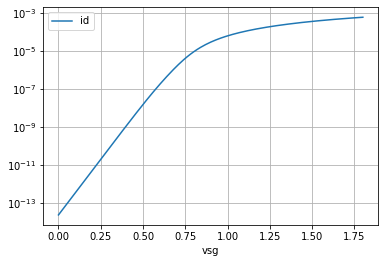

In [19]:
df.plot(x="vsg", y="id", logy=True, grid=True)
plt.show()

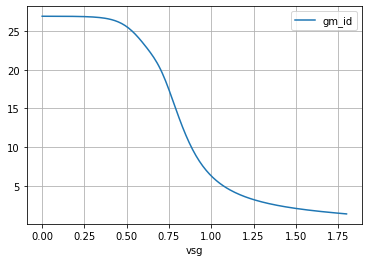

In [20]:
df.plot(x="vsg", y="gm_id", grid=True)
plt.show()

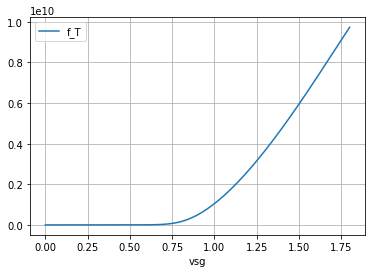

In [47]:
df.plot(x="vsg", y="f_T", grid=True)
plt.show()

## III. Summary of your Idea

This is where you summarize your work. Comparison tables and a description of your expected results should be listed here.

## IV. Planification and Tasks

Planning and breakdown of tasks are usually helpful for a successful project. Good Luck!